This first section will make a really simple circuit by apply an H and CX gate

In [40]:
from qiskit import *

In [41]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

In [42]:
%matplotlib inline

In [43]:
circuit.draw()

q5_0: 
      
q5_1: 
      
c5: 2/

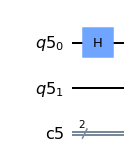

In [44]:
circuit.h(qr[0])
circuit.draw(output='mpl')

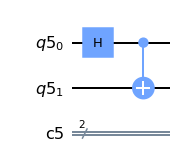

In [45]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

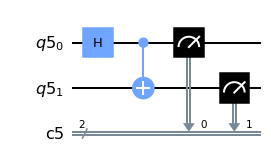

In [46]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

The following section will *simulate* the circuit built in the previous section on my *local machine*. This is done using an [Aer](https://github.com/Qiskit/qiskit-aer) simulator on the `qasm` (Quantum Assembly Language) backend

In [47]:
from qiskit.providers.aer import AerSimulator
simulator = AerSimulator(provider='qasm')

Use the `execute` function from qiskit and provide the circuit and backend

In [49]:
result = execute(circuit, simulator).result()

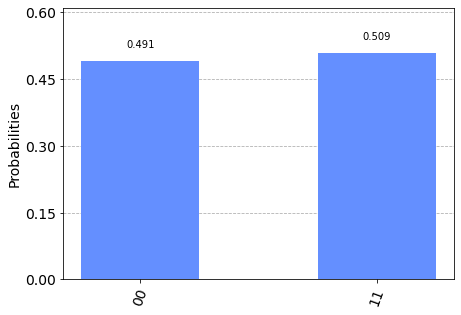

In [50]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Now run the program on an IBM quantum computer

In [60]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
IBMQ.ibmq.load_account()
provider = IBMQ.ibmq.get_provider('ibm-q')

ibmqfactory.load_account:WARNING:2022-08-14 11:52:18,034: Credentials are already in use. The existing account in the session will be replaced.


In [62]:
# provider.backends()
qcomp = provider.get_backend('ibmq_quito')
job = execute(circuit, backend=qcomp)

The following is used to monitor when my job is able to run on the public qcpu

In [63]:
job_monitor(job)

Job Status: job has successfully run


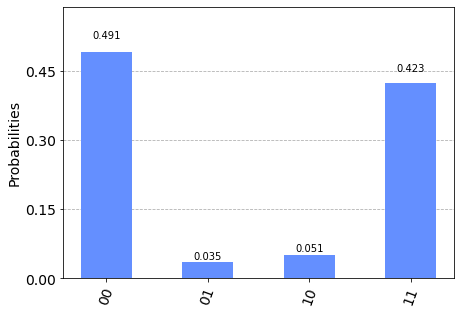

In [64]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [81]:
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Operator
from qiskit.visualization.array import array_to_latex
circuit = QuantumCircuit(3)
circuit.cx(0, 1)
circuit.cx(1, 2)
array_to_latex(Operator(circuit))

<IPython.core.display.Latex object>